# Subtopic B: K-fold cross validation and validation curves
models are trained on traing data and tested on test data
the accuracy on the training set could be high resulting to overfitting which can result to poor performance on unseen data
traiing models on data split in this way is not good enough as there is a natural variance in the data set that causes accuracies to be different even if the test and train splits are equal
moreso, using just one training and test set can lead to biaise towards certain models and lead to overfitting

K-fold cross validation offers a solution to this problem and allows the variance to be accounted for by way of an error estimate on each accuracy calculation

validation curves are used for tuning model parameters.

validadion curves plot the accuracy as a function of a hyper parameter

after testing on difffent data sets and once the best model has been identified, it should be be trained on the entirety of the dataset before being used to predict actual classifications

when doing cross vcalidation, you dont need to do the training test split

In [2]:
import pandas as pd
f = pd.read_csv('/Users/uczhn/Documents/AZURE_DATA_SCIENCE_PYTHON/Data/German_credit.csv')
df = pd.DataFrame(f)
df

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [3]:
# using just two features
features = ['age', 'credit_amount']
X = df[features].values 

In [4]:
# definng the outcomne var
y = df.default.values

In [6]:
# Instantiate the model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [11]:
# stratified kfold cross validation: train the model with stratified k-fold crossvalidation

# we usestratified k fold. The improvement is that stratified k-fold cross
# validation maintains roughly even class label populations in the folds.
# this this reduces the overall variance in the models and decreases the likelihood of highly unbalanced models causing bias

from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(1)
scores = cross_val_score(
            estimator=clf,
            X=X,
            y=y,
            cv=10) # using 10 variatrion of our model

print('accuracy = {:.3f} +/- {:.3f}'.format(scores.mean(), scores.std())) # this prints the mean and sd of the 10 cross validadionj scores


accuracy = 0.701 +/- 0.024


In [ ]:
# Calculate the accuracy as the average of each fold.
#
#We can also see the individual accuracies for each fold by printing scores.

In [12]:
scores

array([0.72, 0.69, 0.75, 0.71, 0.68, 0.7 , 0.66, 0.72, 0.68, 0.7 ])

In [ ]:
# Using cross_val_score is very convenient, but it doesn't tell us about the accuracies within each class. 

# We can do this manually with the model_ selection.StratifiedKFold class. 
# This class takes the number of folds as an initialization parameter, 
 # then the split method is used to build randomly sampled "masks" for the data.
    # A mask is simply an array containing indexes of items in another array, 
    #where the items can then be returned by doing this: data[mask]

In [16]:
# Custom function for class accuracies

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv).split(X, y)

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X[train], y[train])
        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)
        class_acc = cmat.diagonal()/cmat.sum(axis=1)
        class_accuracy.append(class_acc)
        print('fold: {:d} accuracy: {:s}'.format(k+1, str(class_acc)))
        
    return np.array(class_accuracy)

In [17]:

# Stratified k-fold cross validation

np.random.seed(1)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.98571429 0.1       ]
fold: 2 accuracy: [0.97142857 0.03333333]
fold: 3 accuracy: [1.         0.16666667]
fold: 4 accuracy: [0.95714286 0.13333333]
fold: 5 accuracy: [0.94285714 0.06666667]
fold: 6 accuracy: [1. 0.]
fold: 7 accuracy: [0.94285714 0.        ]
fold: 8 accuracy: [0.95714286 0.16666667]
fold: 9 accuracy: [0.92857143 0.1       ]
fold: 10 accuracy: [0.97142857 0.06666667]
accuracy = [0.96571429 0.08333333] +/- [0.02321154 0.05821416]


In [18]:

# Calcualte a validation curve

from sklearn.model_selection import validation_curve

clf = RandomForestClassifier(n_estimators=10)
max_depths = np.arange(3, 16, 3)

train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=10);

In [23]:
# Function to draw the validation curve
import matplotlib.pyplot as plt
import seaborn as sns

def plot_validation_curve(train_scores, test_scores,
                          param_range, xlabel='', log=False):
    '''
    This code is from scikit-learn docs:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    
    Also here:
    https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
    '''
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    return fig

(0.9, 0.95)

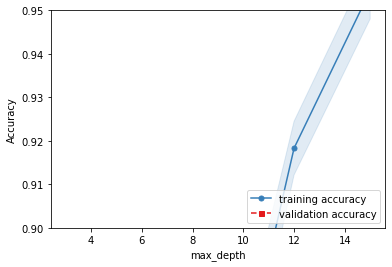

In [26]:
plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.ylim(0.9, 0.95)